Derivace funkce jedné proměnné

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt 
#from IPython.display import display, clear_output

Zadání:
Numerická derivace je velice krátké téma. V hodinách jste se dozvěděli o nejvyužívanějších typech numerické derivace (dopředná, zpětná, centrální). Jedno z neřešených témat na hodinách byl problém volby kroku. V praxi je vhodné mít krok dynamicky nastavitelný. Algoritmům tohoto typu se říká derivace s adaptabilním krokem. Cílem tohoto zadání je napsat program, který provede numerickou derivaci s adaptabilním krokem pro vámi vybranou funkci. Proveďte srovnání se statickým krokem a analytickým řešením.

Metoda konečné diference - definice

Cíl: Spočítat derivaci funkce v rozsahu x hodnot za použití metody konečné diference
Vstupy: f       - funkce (lambda)
        x       - rozsah x hodnot na kterých je funkce f definovaná
        type    -  označuje typ konečné diference (dopředná, zpětná, centrální)
        error   - reprezentuje požadovanou míru přesnosti při určování kroku
        static  - určuje jestli použijeme statickou nebo adaptabilní metodu (krok)
Výstupy: D      - aproximace derivace f
         X      - hodnoty x, na kterých byla derivace vyhodnocena

In [3]:
def finite_diff(f, x, type="forward", error=0.01, static=True):
 
    if (type == "backward"):
        g = lambda x, h:    (f(x) - f(x-h))/h
    elif (type == "central"):
        g = lambda x, h:    (f(x+h) - f(x-h))/(2*h)
    elif (type == "forward"):
        g = lambda x, h:    (f(x+h) - f(x))/h  
    else:
        print("Není definován typ konečné diference!")
        return

    D = []
    X = []
    x_ = x[0]
    if(not static):
        #Derivace s adaptabilním krokem
        x_ = x[0]
        while x_ < x[-1]:
                
            h1 = error
            h2 = error/2

            dx1 = g(x_, h1)
            dx2 = g(x_, h2)
            
            while(abs(dx1 - dx2)>= error):
                h1 = h2
                h2 = h2/2

                dx1 = g(x_, h1)
                dx2 = g(x_, h2)
            
            D.append(dx2)
            X.append(x_)
            x_ = x_ + h2
    else:
        #Derivace se statickým krokem
        #Za pomocí erroru definuj statický krok
        h = 2*np.sqrt(error)
        #h = (x[-1] - x[0])/len(x)
        for x_ in x:
            dx = g(x_, h)
            D.append(dx)
            X.append(x_)
    
    return D, X

Definice funkce, pro kterou chceme aproximovat derivaci

In [4]:
x = sym.Symbol('x')

f_ = sym.exp(-0.1*x)*sym.cos(x)
#f_ = sym.log(x)
#f_ = x**4 - 2*x**2

In [5]:
df_ = sym.diff(f_)
f = sym.lambdify(x, f_)
df = sym.lambdify(x, df_)

error = 0.5
x_min = 0
x_max = 10

x_vals = np.linspace(x_min, x_max, 500)

Použití konečné diference s adaptabilním i statickým krokem

In [6]:
D_adaptive, X_ad = finite_diff(f, x_vals,"central", error, False)
D_static, X_stat = finite_diff(f, x_vals, "central", error, True)

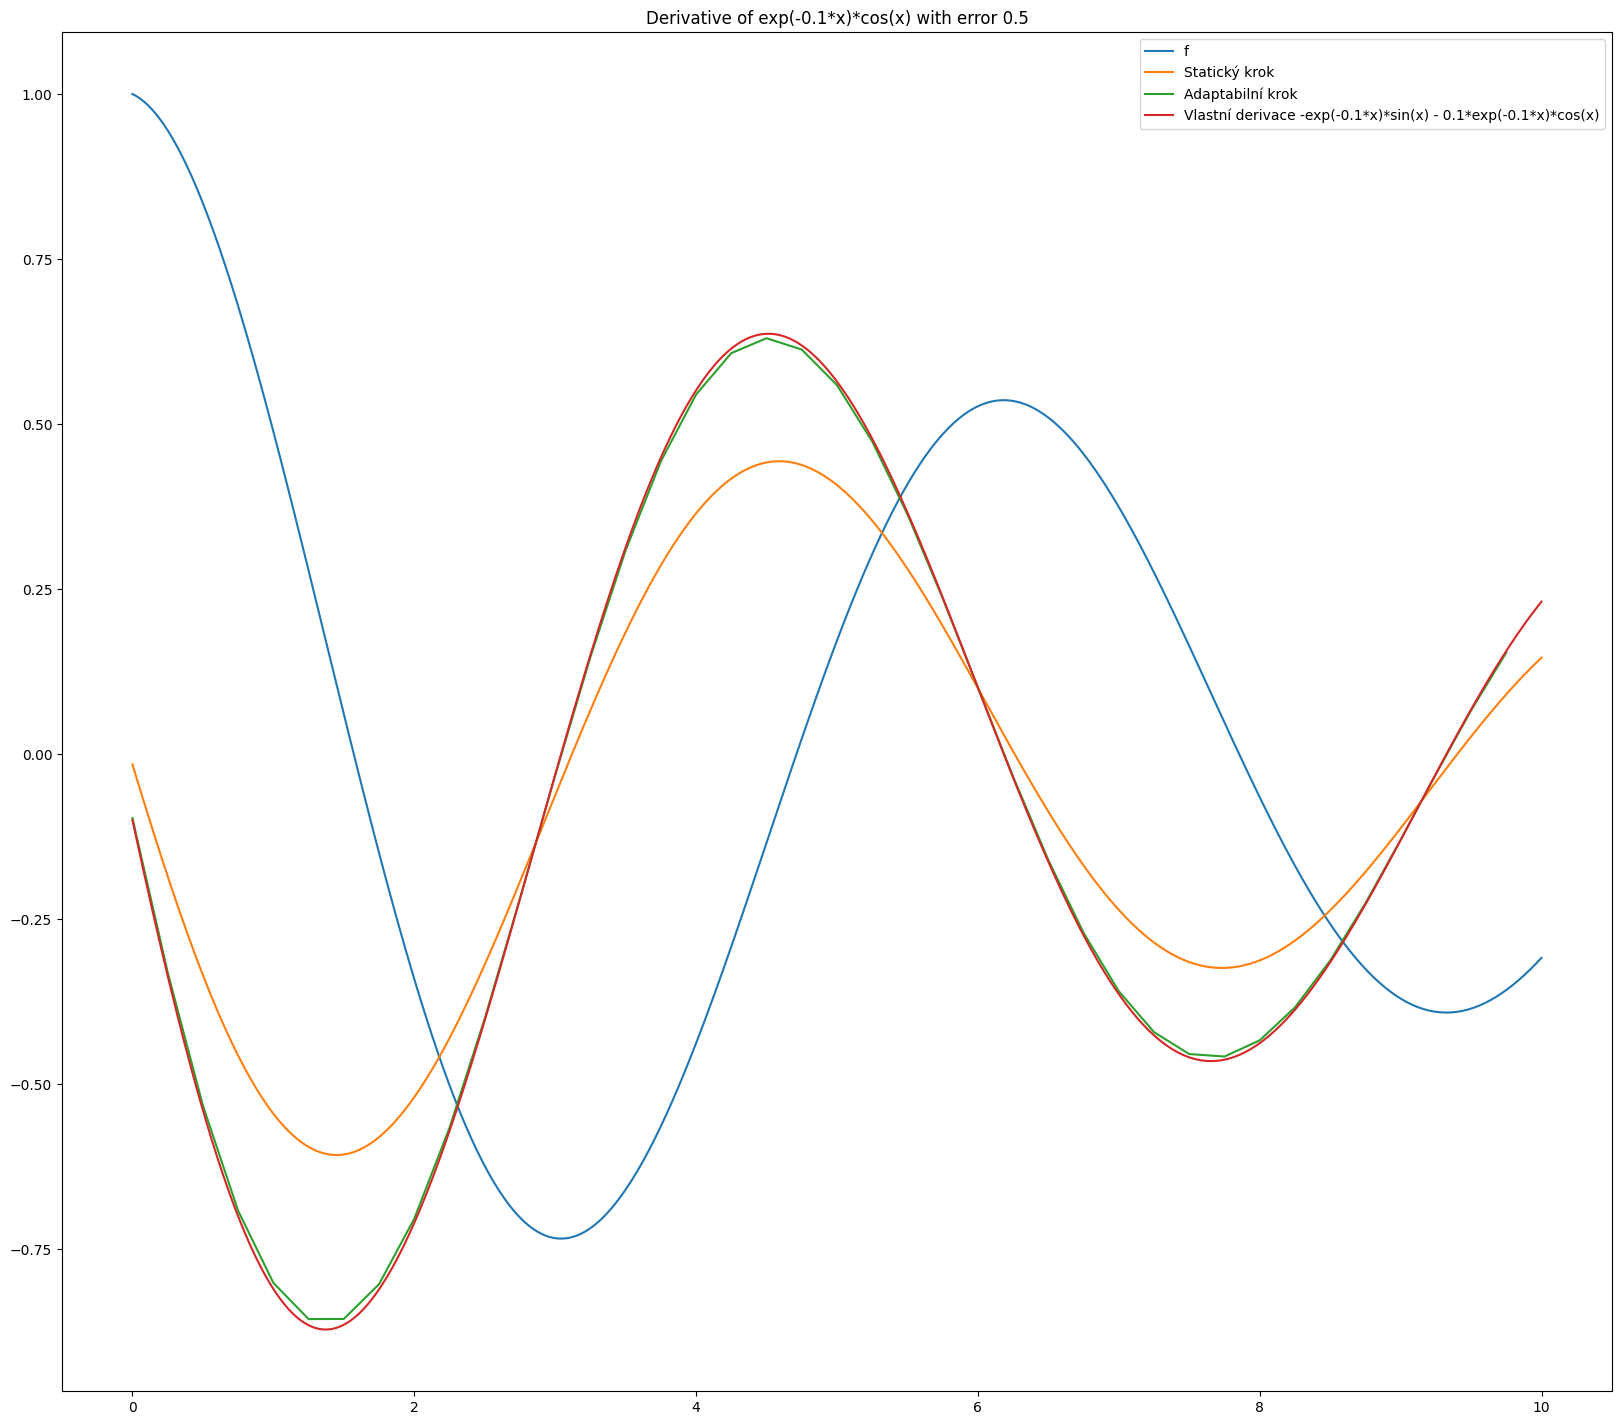

In [7]:
plt.rc('grid', linestyle=':', color='black', linewidth=2)
plt.figure(figsize=(20,18), dpi=100)
plt.title(f"Derivative of {f_} with error {error}")
timeDelay = 0.75

plt.plot(x_vals, f(x_vals), label=f'f')
#plt.pause(timeDelay)

plt.plot(X_stat, D_static, label='Statický krok')
#plt.pause(timeDelay)

plt.plot(X_ad, D_adaptive, label='Adaptabilní krok')
#plt.pause(timeDelay)

plt.plot(x_vals, df(x_vals), label=f'Vlastní derivace {df_}')
#plt.pause(timeDelay)

# plt.plot()
plt.legend()
plt.show()